In [1]:
import pickle 

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from collections import defaultdict

In [2]:
import os

from methods.baselines import CoinBettingCI, HorseRaceCI
from methods.lbup import LowerBoundUniversalPortfolioCI
from methods.up import UniversalPortfolioCI
from methods.hybrid import HybridUPCI
from methods.precise import PRECiSE

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def generate_bernoulli(t, p, seed=0):
    np.random.seed(seed)
    return (np.random.uniform(size=t) <= p).astype(int)

In [5]:
def generate_beta(t, betas, seed=0):
    np.random.seed(seed)
    return np.random.beta(*betas, size=t)

# Experiments

In [62]:
wor = False

t = 10 ** 4
ts = np.arange(1, t + 1)

delta = 0.05
seeds = range(5)

tcut = 10 ** 5
tup = 50

In [61]:
# mu = 0.25; kwd = 'bern0.25'; title = 'Bern(0.25)'
mu = 0.25; kwd = 'beta1,3'; title = 'Beta(1,3)'
# mu = 0.25; kwd = 'beta10,30'; title = 'Beta(10,30)'    

import _pickle as cPickle
with open(r'exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), "rb") as f:
    lower_ci = cPickle.load(f)
with open(r'exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), "rb") as f:
    upper_ci = cPickle.load(f)
with open(r'exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), "rb") as f:
    telapsed = cPickle.load(f)


In [63]:
lower_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
upper_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
telapsed = defaultdict(lambda: np.zeros((len(seeds), t // 100)))

for j, seed in enumerate(seeds):
#     xs = generate_bernoulli(t, p=0.25, seed=seed); mu = 0.25; kwd = 'bern0.25'; title = 'Bern(0.25)'
    xs = generate_beta(t, betas=[1, 3], seed=seed); mu = 0.25; kwd = 'beta1,3'; title = 'Beta(1,3)'
#     xs = generate_beta(t, betas=[10, 30], seed=seed); mu = 0.25; kwd = 'beta10,30'; title = 'Beta(10,30)'    
    
    print("Seed {}: Naive coin betting...".format(seed))
    lower_ci['CB'][j], upper_ci['CB'][j] = CoinBettingCI(delta).construct(xs[:tcut], wor=wor)
    
    print("Seed {}: Horse race...".format(seed))
    lower_ci['HR'][j], upper_ci['HR'][j], telapsed['HR'][j] = HorseRaceCI(delta).construct(xs[:tcut], wor=wor)
        
    print("Seed {}: PRECiSE...".format(seed))
    lower_ci['PRECiSE'][j], upper_ci['PRECiSE'][j], telapsed['PRECiSE'][j] = PRECiSE(delta).construct(xs[:tcut], wor=wor)

    if 'bern' not in kwd:
        print("Seed {}: UP...".format(seed))
        lower_ci['UP'][j], upper_ci['UP'][j], telapsed['UP'][j], *_ = UniversalPortfolioCI(delta).construct(xs[:tcut], wor=wor)

        print("Seed {}: LBUP...".format(seed))
        lower_ci['LBUP1'][j], upper_ci['LBUP1'][j], telapsed['LBUP1'][j] = LowerBoundUniversalPortfolioCI(delta, n=1).construct(xs[:tcut], wor=wor, eps=1e-3)
        lower_ci['LBUP2'][j], upper_ci['LBUP2'][j], telapsed['LBUP2'][j] = LowerBoundUniversalPortfolioCI(delta, n=2).construct(xs[:tcut], wor=wor, eps=1e-3)
        lower_ci['LBUP3'][j], upper_ci['LBUP3'][j], telapsed['LBUP3'][j] = LowerBoundUniversalPortfolioCI(delta, n=3).construct(xs[:tcut], wor=wor, eps=1e-3)

        print("Seed {}: HybridUP...".format(seed))
        lower_ci['HybridUP1,{}'.format(tup)][j], upper_ci['HybridUP1,{}'.format(tup)][j], telapsed['HybridUP1,{}'.format(tup)][j] = HybridUPCI(delta, n=1, tup=tup).construct(xs[:tcut], wor=wor)
        lower_ci['HybridUP2,{}'.format(tup)][j], upper_ci['HybridUP2,{}'.format(tup)][j], telapsed['HybridUP2,{}'.format(tup)][j] = HybridUPCI(delta, n=2, tup=tup).construct(xs[:tcut], wor=wor)
        lower_ci['HybridUP3,{}'.format(tup)][j], upper_ci['HybridUP3,{}'.format(tup)][j], telapsed['HybridUP3,{}'.format(tup)][j] = HybridUPCI(delta, n=3, tup=tup).construct(xs[:tcut], wor=wor)
    

Seed 0: LBUP...


/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:75: RuntimeWarning: divide by zero encountered in log
  log_even = logsumexp([logbinom(k, j) + np.log(sums[j]) - j * np.log(m) for j in range(0, k + 1, 2)])
/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:76: RuntimeWarning: divide by zero encountered in log
  log_odd = logsumexp([logbinom(k, j) + np.log(sums[j]) - j * np.log(m) for j in range(1, k + 1, 2)])


100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 

/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:62: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  z, err = integrate.quad(phi, 0, 1, args=args)


100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 

/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:62: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z, err = integrate.quad(phi, 0, 1, args=args)


100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 Seed 0: HybridUP...


/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:75: RuntimeWarning: invalid value encountered in double_scalars
  log_even = logsumexp([logbinom(k, j) + np.log(sums[j]) - j * np.log(m) for j in range(0, k + 1, 2)])
/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:50: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return np.log(integrate.quad(lambda x: np.exp(self.log_phi(x)), 0, 1)[0])
/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/lbup.py:90: RuntimeWarning: divide by zero encountered in log
  return np.log(1 - m) + base_log_z
/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/up.py:21: RuntimeWarning: divide by zero encountered in log
  np.arange(t + 1) * np.log(mu + eps) -
/Users/jonryu/src/gambling/confidence-sequence-via-gambling/methods/up.py:21: RuntimeWarning: invalid

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 100 200 300 400 

In [7]:
if not os.path.exists('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))):
    with open('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(lower_ci), f)
    with open('exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(upper_ci), f)
    with open('exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(telapsed), f)
else:
    print("Warning: {} already exists!".format('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))))

# Plot!

In [25]:
line_configs = dict()
line_configs['CB'] = dict(c='brown', ls='solid', marker='x')
line_configs['HR'] = dict(c='m', ls='solid', marker='o')

line_configs['PRECiSE'] = dict(c='tab:pink', ls=(0, (3, 1, 1, 1)), marker='^')
line_configs['UP'] = dict(c='black', ls='-.', markevery=0.1, marker='D')

line_configs['LBUP1'] = dict(c='orange', ls='dotted', marker='+')
line_configs['LBUP2'] = dict(c='purple', ls='dotted', marker='+')
line_configs['LBUP3'] = dict(c='red', ls='dotted', marker='+')

line_configs['HybridUP1,50'] = dict(c='green', ls='--', marker='s', markersize=5)
line_configs['HybridUP2,50'] = dict(c='orange', ls='--', marker='s', markersize=5)
line_configs['HybridUP3,50'] = dict(c='blue', ls='--', marker='s', markersize=5)

for key in line_configs:
    line_configs[key]['markevery'] = 0.1

In [65]:
sizes = dict()
for key in upper_ci:
    sizes[key] = (upper_ci[key][:tcut] - lower_ci[key][:tcut]).mean(axis=0)

up_key = 'UP' if 'bern' not in kwd else 'HR'
for key in upper_ci:
    if key != up_key:
        sizes[key] = np.maximum(1e-7, sizes[key] - sizes[up_key])

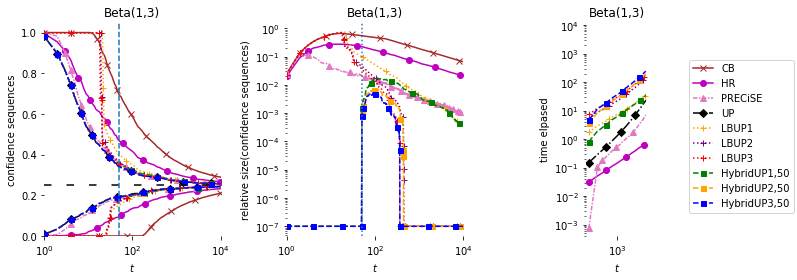

In [66]:
# plot
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))

# 1) plot confidence sequences
ax = axes[0]
for key in upper_ci:
    ax.plot(ts, lower_ci[key].mean(axis=0), **line_configs[key], label=key)
    ax.plot(ts, upper_ci[key].mean(axis=0), **line_configs[key])
    
# etc
ax.axhline(y=mu, c='k', linestyle=(0, (5, 10)))
ax.axvline(x=tup, linestyle='dashed')
ax.set_xscale('log')
# ax.set_ylim([0.24, 0.26])
# ax.set_ylim([0.2, 0.3])
ax.set_ylim([0, 1.05])
ax.set_xlim([1, t])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('confidence sequences')
ax.set_title(title)

# 2) plot relative confidence sequence sizes compared to UP
ax = axes[1]
for key in upper_ci:
    if key != up_key:
        ax.plot(ts[:tcut], sizes[key], **line_configs[key], label=key)

ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(x=50, linestyle='dotted')
# ax.set_ylim([-0.005, 1.01])
ax.set_xlim([1, t])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('relative size(confidence sequences)')
ax.set_title(title)

# 3) plot time elapsed
ax = axes[2]

every = 100
tlogs = np.arange(every, t + every, every)

for key in telapsed:
    ax.plot(tlogs, telapsed[key].mean(axis=0).cumsum(), **line_configs[key], label=key)

ax.set_xlim([every, t])
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis('square')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('time elpased')
ax.set_title(title)

# show legends
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='center left', 
           bbox_to_anchor=(0.95, .5),
           ncol=1)
fig.tight_layout()
# fig.subplots_adjust(left=0, wspace=0.3) 
fig.savefig('figs/ex_{}.pdf'.format(kwd), bbox_inches='tight')

plt.show()

In [68]:
for key in telapsed:
    cumt = telapsed[key].mean(axis=0).cumsum()
    print(key, end=': ')
    coeffs = []
    for j in range(1, 11):
        coeffs.append((np.log(cumt[-j] - cumt[0]) - np.log(cumt[-j-1] - cumt[0])) / (np.log(tlogs[-j] - tlogs[0]) - np.log(tlogs[-j-1] - tlogs[0])))
    print(np.mean(coeffs))

HR: 0.6878585064672971
PRECiSE: 1.3858536589500317
UP: 1.4632863542454213
LBUP1: 0.7400879363973579
LBUP2: 0.868267565179711
LBUP3: 0.8464083126163015
HybridUP1,50: 0.7416089187981054
HybridUP2,50: 0.8788402040832898
HybridUP3,50: 0.8457149448402831


0


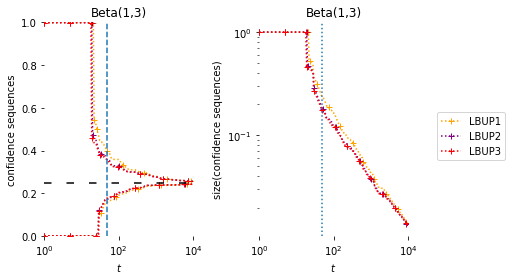

1


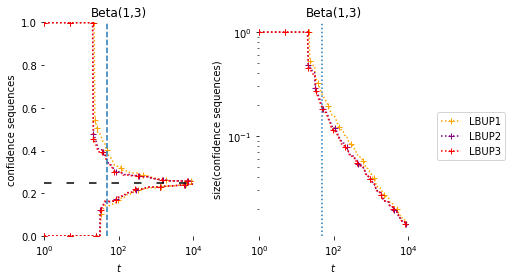

2


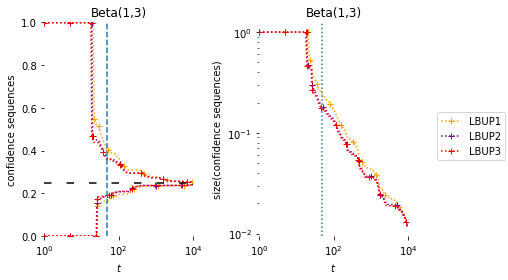

3


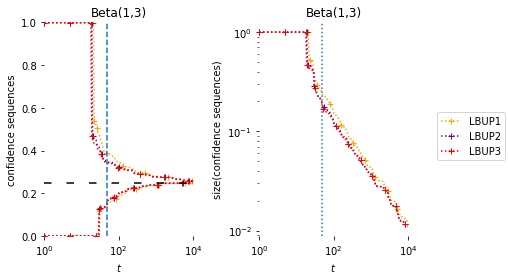

4


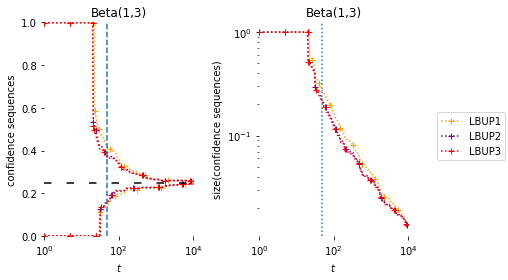

In [64]:
for j in range(5):
    print(j)
    
    # plot
    fig, axes = plt.subplots(ncols=2, nrows=1)
    
    ax = axes[0]
    for key in lower_ci:
        if 'LBUP' in key:
            ax.plot(ts[:tcut], lower_ci[key][j][:t], **line_configs[key], label=key)
            ax.plot(ts[:tcut], upper_ci[key][j][:t], **line_configs[key])

    ax.axhline(y=mu, c='k', linestyle=(0, (5, 10)))
    ax.axvline(x=tup, linestyle='dashed')
    ax.set_xscale('log')
    # ax.set_ylim([0.24, 0.26])
    # ax.set_ylim([0.2, 0.3])
    ax.set_ylim([0, 1])
    ax.set_xlim([1, t])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel(r'$t$')
    ax.set_ylabel('confidence sequences')
    ax.set_title(title)

    ax = axes[1]
    for key in lower_ci:
        if 'LBUP' in key:
            ax.plot(ts[:tcut], (upper_ci[key] - lower_ci[key])[j][:t], **line_configs[key], label=key)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axvline(x=50, linestyle='dotted')
    # ax.set_ylim([-0.005, 1.01])
    ax.set_xlim([1, t])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel(r'$t$')
    ax.set_ylabel('size(confidence sequences)')
    ax.set_title(title)

    handles, labels = ax.get_legend_handles_labels()
    fig.tight_layout()
    fig.legend(handles, labels, 
               loc='center left', 
               bbox_to_anchor=(1, .5),
               ncol=1)

    plt.show()